In [1]:
print('Hello world')

Hello world


In [2]:
eq_list = ['2008 Wenchuan EQ', '2010 Chile EQ', '2011 Tohuku EQ', '2017 Mexico EQ', '2018 Hawaii EQ']
eq_mag_list = [7.8, 8.4, 9.2, 8.2, 4.5]

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
idx_max = np.argmax(eq_mag_list)

In [10]:
eq_list[idx_max]
print('Earthquake Name: {n}, earthquake magnitude: {m}'.format(n=eq_list[idx_max], m=eq_mag_list[idx_max]))

Earthquake Name: 2011 Tohuku EQ, earthquake magnitude: 9.2


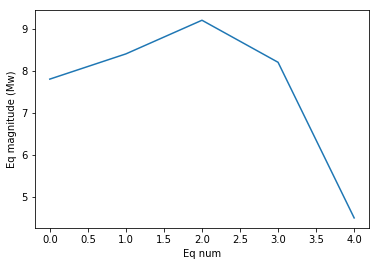

In [12]:
plt.figure()
plt.plot(eq_mag_list)
plt.xlabel('Eq num')
plt.ylabel('Eq magnitude (Mw)')
plt.show()

In [17]:
fname = '/Users/yunjunz/development/python/a_python_guide_to_geophysics/FernandinaSenDT128/bl_list.txt'
f = open(fname, 'r')
lines = f.readlines()
f.close()

In [35]:
fcontent = np.loadtxt(fname, dtype=str)
datestr = fcontent[:, 0]
orbits = fcontent[:, 1].astype(float)
print('mean value:', np.mean(orbits))
print('max value:', np.max(orbits))
print('STD:', np.std(orbits))

mean value: 79.77202559490593
max value: 184.52122497558594
STD: 41.18166271379176


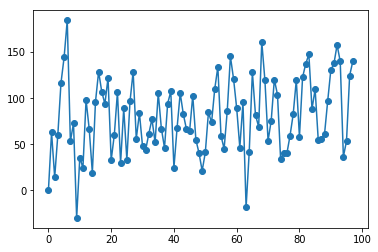

In [34]:
plt.figure()
plt.plot(orbits, '-o')
plt.show()

In [2]:
import h5py
fname = '/Users/yunjunz/development/python/a_python_guide_to_geophysics/FernandinaSenDT128/velocity.h5'

with h5py.File(fname, 'r') as f:
    data = f['velocity'][:]
    atr = dict(f.attrs)


In [49]:
with h5py.File('velocity_sq.h5', 'w') as fo:
    fo.create_dataset('velcoity2', data=data2)

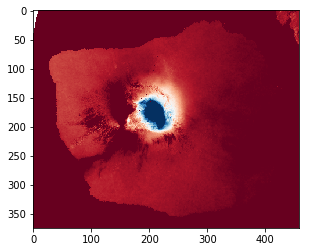

In [64]:
plt.figure()
plt.imshow(data, cmap='RdBu', vmin=0, vmax=0.04)
plt.show()

In [70]:
fname = '/Users/yunjunz/development/python/a_python_guide_to_geophysics/FernandinaSenDT128/timeseries.h5'
with h5py.File(fname, 'r') as f:
    ts_data = f['timeseries'][:]
    datestr = f['date'][:]
    datestr = [i.decode('utf8') for i in datestr]

In [97]:
from datetime import datetime as dt
dates = [dt.strptime(i, '%Y%m%d') for i in datestr]
years = np.array([i.year + (i.timetuple().tm_yday - 1) / 365.25 for i in dates])

In [6]:
A = np.ones((len(years), 2), dtype=np.float32)
A[:, 0] = years
num_date, length, width = ts_data.shape

NameError: name 'np' is not defined

In [119]:
A_inv1 = np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)
A_inv2 = np.dot(np.linalg.pinv(np.dot(A.T, A)), A.T)
D = ts_data.reshape(num_date, -1)

In [120]:
X = np.dot(A_inv1, D)
vel = X[0, :].reshape(length, width)

In [123]:
mask_file = '/Users/yunjunz/development/python/a_python_guide_to_geophysics/FernandinaSenDT128/maskTempCoh.h5'
with h5py.File(mask_file, 'r') as f:
    mask = f['mask'][:]

In [131]:
import os
import glob
os.getcwd()
mask_file = os.getcwd()+'/FernandinaSenDT128/maskTempCoh.h5'
h5_files = glob.glob('*/*.h5')

In [136]:
x = os.path.splitext(h5_files[0])[0]

In [138]:
x[0:6]

'Fernan'